In [8]:
! pip install opencv-python

In [4]:
import tensorflow as tf # imort the tenserflow liabrary

In [5]:
data = tf.keras.datasets.mnist  ## to get the image data tensorflow has provided a Keras api to access the datasets 

In [6]:
# After loading the data, Divide it into a train and testing datasets  

In [7]:
# unpacking a datasets into a train and test dataset 
(x_train , y_train), (x_test , y_test) = data.load_data()

In [11]:
x_train.shape 

(60000, 28, 28)

In [12]:
len(y_train)

60000

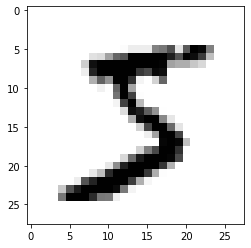

In [13]:
# just chack the graph, how data looks like 
import matplotlib.pyplot as plt 
#plt.imshow(x_train[0]) # Display data as an image
#plt.show() # in order to execute graph 
# we dont know whether the image is color or black&white 
# will change the configuration 
plt.imshow(x_train[0] , cmap=plt.cm.binary)

In [14]:
# cjecking the value of each pixels 
print(x_train[0]) # before normalization 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

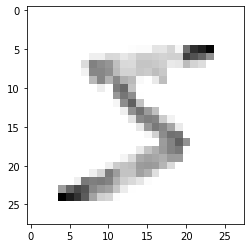

In [26]:
# As images are in gray Scale (1 channel=0 to 255), not colored 
# Normalizing the data| pre-processing Step 
# in order to train it will normalize it

x_train = tf.keras.utils.normalize(x_train , axis = 1 ) # keras built in command to normalize the data  
x_test = tf.keras.utils.normalize(x_test , axis = 1 )
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [29]:
print(x_train[0]) # 255 will be closer to 1 .. we can sset all values are normalize 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [1]:
x_train_1 = x_train.reshape(len(train_images), 28,28,1)
x_test_1 = x_test.reshape(len(test_images), 28,28,1)

In [15]:
# deep learning architecture 
# training on 60000 sample dataset 
# crate a deep learning network in sequence 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [17]:
# crating a Neural Network 
model = Sequential() # we are going to concatenate our layers 

# First Convilution Layer 
model.add(Conv2D(64, (3,3), input_shape = x_train_1.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# second Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# Fully connected layer 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully connected layer 
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully connected layer 
model.add(Dense(10))
model.add(Activation("softmax"))


In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
#our target is to increase the accuracy 

In [23]:
model.fit(x_train_1,y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 44s 32ms/step - loss: 0.3031 - accuracy: 0.9060 - val_loss: 0.1155 - val_accuracy: 0.9648
Epoch 2/5
1313/1313 [==============================] - 44s 34ms/step - loss: 0.0999 - accuracy: 0.9694 - val_loss: 0.0991 - val_accuracy: 0.9697
Epoch 3/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0712 - accuracy: 0.9780 - val_loss: 0.0683 - val_accuracy: 0.9791
Epoch 4/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0535 - accuracy: 0.9835 - val_loss: 0.0760 - val_accuracy: 0.9770
Epoch 5/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0451 - accuracy: 0.9849 - val_loss: 0.0888 - val_accuracy: 0.9736


In [24]:
# Evaluating on testing dataset 
test_loss, test_acc = model.evaluate(x_test_1, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0898 - accuracy: 0.9734
0.08977782726287842
0.9733999967575073


In [25]:
prediction = model.predict([x_test_1])

313/313 [==============================] - 5s 7ms/step


In [26]:
print(prediction)

[[1.3619765e-08 1.8979180e-06 4.1279968e-06 ... 9.9997532e-01
  2.4360013e-08 1.0817864e-05]
 [1.3024545e-04 9.2671411e-07 9.9972433e-01 ... 3.2752164e-06
  1.1376342e-06 6.4675092e-05]
 [3.4348157e-06 9.9989176e-01 3.1445422e-06 ... 1.5344720e-05
  2.0491648e-06 2.2310789e-05]
 ...
 [4.6986370e-09 1.3689642e-07 3.2677399e-08 ... 9.0861747e-08
  5.4058933e-08 9.7596148e-06]
 [3.0646555e-05 4.0738882e-08 1.2955768e-09 ... 1.3404643e-08
  6.3643587e-04 5.2731375e-05]
 [2.5018942e-02 2.6879701e-05 4.9142162e-03 ... 3.1046568e-06
  2.2605823e-04 1.0790714e-03]]


In [28]:
# convert the predictions form one hot encoding, we need to use numpy for that 
import numpy as np
print(np.argmax(prediction[0]))

7


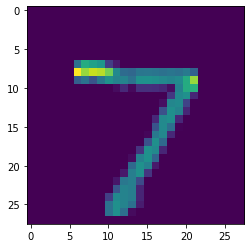

In [29]:
plt.imshow(x_test[0])